---   
<img align="left" width="110"   src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg"> 

<h1 align="center">Tools and Techniques for Data Science</h1>
<h1 align="center">Course: Python for Data Scientist</h1>

---

<h3><div align="right">Muhammad Sheraz(Data Scientist)</div></h3>    

<h1 align="center">Lecture 3.17 (Pandas-09)</h1>

## _Aggregating and Grouping Dataframes.ipynb_

<img align="left" width="1000" height="1000"  src="images/groupbyfinal.png"  >

## Learning agenda of this notebook
1. Overview of Aggregation Functions and the `agg()` method
    - Applying a Built-in Aggregation Function on Entire Dataframe Object
    - Applying a Built-in Aggregation Function on a Series Object
    - Applying a User-Defined/Lambda Function on a Series Object<br><br>
2. Computing the Minimum Temperature of each City using **hard way**<br><br>
3. Computing the Minimum Temperature of each City using **`groupby`**<br><br>
4. Practice GroupBy on Stack Overflow Survey Dataset

## 1. Overview of Aggregation Functions and the `agg()` Method
- An aggregation function is one which takes multiple individual values and returns a result.

In [1]:
import pandas as pd
df = pd.read_csv('datasets/groupbydata2.csv')
df

,date,city,temperature,humidity
0,01/01/2022,lahore,8,60
1,02/01/2022,lahore,10,58
2,03/01/2022,lahore,5,51
3,04/01/2022,lahore,6,49
4,05/01/2022,lahore,12,54
5,01/01/2022,karachi,18,74
6,02/01/2022,karachi,10,71
7,03/01/2022,karachi,12,78
8,04/01/2022,karachi,15,76
9,05/01/2022,karachi,16,70


In [4]:
df.groupby('city')

,date,city,temperature,humidity
0,01/01/2022,lahore,8,60
1,02/01/2022,lahore,10,58
2,03/01/2022,lahore,5,51
3,04/01/2022,lahore,6,49
4,05/01/2022,lahore,12,54
5,01/01/2022,karachi,18,74
6,02/01/2022,karachi,10,71
7,03/01/2022,karachi,12,78
8,04/01/2022,karachi,15,76
9,05/01/2022,karachi,16,70


In [7]:
df.groupby('city')['temperature'].head()

0      8
1     10
2      5
3      6
4     12
5     18
6     10
7     12
8     15
9     16
10    -5
11    -3
12    -4
13    -1
14    -7
Name: temperature, dtype: int64

In [8]:
df.groupby('city')['temperature'].min()

city
karachi    10
lahore      5
murree     -7
Name: temperature, dtype: int64

In [9]:
df.groupby('city')['temperature'].min().sort_values()

city
murree     -7
lahore      5
karachi    10
Name: temperature, dtype: int64

In [10]:
df.groupby('city')['temperature'].min().sort_values()[0]

-7

### a. Applying a Built-in Aggregation Function on Entire Dataframe Object

In [11]:
df.min()

date           01/01/2022
city              karachi
temperature            -7
humidity               49
dtype: object

In [12]:
df.count()

date           15
city           15
temperature    15
humidity       15
dtype: int64

In [13]:
# Should be applied to numeric columns only, may raise a warning
df.median()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10572\2026153972.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


temperature     8.0
humidity       68.0
dtype: float64

In [14]:
df.median(numeric_only=True)

temperature     8.0
humidity       68.0
dtype: float64

> We can call the `agg()` method on the dataframe to apply multiple aggregation functions at a time, by passing the `agg()` function a list of aggregation functions as strings.

In [15]:
df.agg(['min', 'max',  'count'])

,date,city,temperature,humidity
min,01/01/2022,karachi,-7,49
max,05/01/2022,murree,18,78
count,15,15,15,15


> We can call the `describe()` method on the dataframe to get descriptive statistical measures on all its numeric columns.

In [16]:
df.describe()

,temperature,humidity
count,15.000000,15.000000
mean,6.133333,64.933333
std,8.253715,9.153194
min,-7.000000,49.000000
25%,-2.000000,59.000000
50%,8.000000,68.000000
75%,12.000000,71.500000
max,18.000000,78.000000


### b. Applying a Built-in Aggregation Function on a Series Object

In [17]:
df['temperature'].min()

-7

In [18]:
df['temperature'].max()

18

In [19]:
df['temperature'].mean()

6.133333333333334

> We can call the `agg()` method on a series to apply multiple aggregation functions at a time, by passing the `agg()` function a list of aggregation functions as strings.

In [20]:
df['temperature'].agg(['min', 'max', 'mean', 'count'])

min      -7.000000
max      18.000000
mean      6.133333
count    15.000000
Name: temperature, dtype: float64

> We can call the `describe()` method on the dataframe to get descriptive statistical measures on all its numeric columns.

In [21]:
df['temperature'].describe()

count    15.000000
mean      6.133333
std       8.253715
min      -7.000000
25%      -2.000000
50%       8.000000
75%      12.000000
max      18.000000
Name: temperature, dtype: float64

In [22]:
df.agg(['min', 'max', 'mean', 'count'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10572\4154098091.py:1: FutureWarning: ['date', 'city'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['min', 'max', 'mean', 'count'])


,date,city,temperature,humidity
min,01/01/2022,karachi,-7.000000,49.000000
max,05/01/2022,murree,18.000000,78.000000
mean,NaN,NaN,6.133333,64.933333
count,15,15,15.000000,15.000000


### c. Applying a User-Defined/Lambda Function on a Series Object using the `apply()` Method
- We have used this `apply()` method before as well that is used to invoke function on values of Series and return a resulting series.

In [23]:
df.temperature

0      8
1     10
2      5
3      6
4     12
5     18
6     10
7     12
8     15
9     16
10    -5
11    -3
12    -4
13    -1
14    -7
Name: temperature, dtype: int64

In [24]:
def ctof(x):
    return x*9/5+32

df.temperature.apply(ctof)

0     46.4
1     50.0
2     41.0
3     42.8
4     53.6
5     64.4
6     50.0
7     53.6
8     59.0
9     60.8
10    23.0
11    26.6
12    24.8
13    30.2
14    19.4
Name: temperature, dtype: float64

In [25]:
df.temperature.apply(lambda x: x*9/5+32)

0     46.4
1     50.0
2     41.0
3     42.8
4     53.6
5     64.4
6     50.0
7     53.6
8     59.0
9     60.8
10    23.0
11    26.6
12    24.8
13    30.2
14    19.4
Name: temperature, dtype: float64

# How to Compute the Minimum Temperature of Each City?

## 2. Doing it the Hard Way
<img align="center" width="700" height="500"  src="images/groupbyfinal.png"  >

In [26]:
import pandas as pd
df = pd.read_csv('datasets/groupbydata1.csv')
df

,date,city,temperature
0,01/01/2022,lahore,8
1,02/01/2022,lahore,10
2,03/01/2022,lahore,5
3,04/01/2022,lahore,6
4,05/01/2022,lahore,12
5,01/01/2022,karachi,18
6,02/01/2022,karachi,10
7,03/01/2022,karachi,12
8,04/01/2022,karachi,15
9,05/01/2022,karachi,16


### a. Splitting the Dataframe
- We need to use conditional selection technique, in which we pass a Boolean mask for the appropriate city column to be selected. Can do it using two ways:
    - Using `df[]` subscript operator
    - Using `df.loc` method

In [27]:
df[df['city']=='karachi']

,date,city,temperature
5,01/01/2022,karachi,18
6,02/01/2022,karachi,10
7,03/01/2022,karachi,12
8,04/01/2022,karachi,15
9,05/01/2022,karachi,16


In [28]:
df[df['city']=='lahore']
df.loc[df.city=='lahore', :]

,date,city,temperature
0,01/01/2022,lahore,8
1,02/01/2022,lahore,10
2,03/01/2022,lahore,5
3,04/01/2022,lahore,6
4,05/01/2022,lahore,12


In [29]:
df[df['city']=='karachi']
df.loc[df.city=='karachi', :]

,date,city,temperature
5,01/01/2022,karachi,18
6,02/01/2022,karachi,10
7,03/01/2022,karachi,12
8,04/01/2022,karachi,15
9,05/01/2022,karachi,16


In [30]:
df[df['city']=='murree']
df.loc[df.city=='murree', :]

,date,city,temperature
10,01/01/2022,murree,-5
11,02/01/2022,murree,-3
12,03/01/2022,murree,-4
13,04/01/2022,murree,-1
14,05/01/2022,murree,-7


>**Limitation:**
>- We have to repeat this process for every city separately.
>- What if there are over 100 cities in the dataset?

### b. Applying the `min()` Function
- We need to apply the `min()` function on the temperature column of all of the above dataframes separately

In [31]:
df.loc[df.city=='lahore', :].temperature.min()

5

In [32]:
df.loc[df.city=='lahore', :].temperature.min()

5

In [33]:
df.loc[df.city=='karachi', :].temperature.min()

10

In [34]:
df.loc[df.city=='murree', :].temperature.min()

-7

>**Limitation:**
>- We have to repeat this process for every city separately.
>- What if there are over 100 cities in the dataset?

### c. Combining the Result
- Since, we have got the minimum temperature of all the cities, we need to combine them to an appropriate series object to be used for later processing.

In [35]:
lhr = df.loc[df.city=='lahore', :].temperature.min()
kci = df.loc[df.city=='karachi', :].temperature.min()
murree = df.loc[df.city=='murree', :].temperature.min()

s = pd.Series(data=[lhr, kci, murree], index=['L_min', 'K_min', 'M_min'] )
s.name= 'Min Temperatures'
s

L_min     5
K_min    10
M_min    -7
Name: Min Temperatures, dtype: int64

# How to Compute the Minimum Temperature of Each City?

## 3. An Elegant Way
<img align="center" width="700" height="500"  src="images/groupbyfinal.png"  >

In [36]:
import pandas as pd
df = pd.read_csv('datasets/groupbydata1.csv')
df

,date,city,temperature
0,01/01/2022,lahore,8
1,02/01/2022,lahore,10
2,03/01/2022,lahore,5
3,04/01/2022,lahore,6
4,05/01/2022,lahore,12
5,01/01/2022,karachi,18
6,02/01/2022,karachi,10
7,03/01/2022,karachi,12
8,04/01/2022,karachi,15
9,05/01/2022,karachi,16


### a. Step 1: Split Step
- In the split step we divide the data inside the dataframe into multiple groups
- Since we need to calculate the minimum temperature of each city, therefore, we will use `groupby()` method on the `city` column of the dataframe.
- This will result a DataFrameGroupBy object, which is an iterable containing multiple small dataframes based on the `by` argument passed to the `groupby()` method

In [37]:
dfgb = df.groupby('city')
dfgb

>- Since this is an iterable, so let us iterate :)

In [38]:
for mydf in dfgb:
    print(mydf)

('karachi',          date     city  temperature
5  01/01/2022  karachi           18
6  02/01/2022  karachi           10
7  03/01/2022  karachi           12
8  04/01/2022  karachi           15
9  05/01/2022  karachi           16)
('lahore',          date    city  temperature
0  01/01/2022  lahore            8
1  02/01/2022  lahore           10
2  03/01/2022  lahore            5
3  04/01/2022  lahore            6
4  05/01/2022  lahore           12)
('murree',           date    city  temperature
10  01/01/2022  murree           -5
11  02/01/2022  murree           -3
12  03/01/2022  murree           -4
13  04/01/2022  murree           -1
14  05/01/2022  murree           -7)


>- To display indices of every group in the dataframe, use `groups` attribute of  `DataFrameGroupBy` object.
>- Returns a Dictionary object (PrettyDict) with keys as the group value and value as list of corresponding row indices

In [39]:
dfgb.groups   # df.groupby('city').groups

{'karachi': [5, 6, 7, 8, 9], 'lahore': [0, 1, 2, 3, 4], 'murree': [10, 11, 12, 13, 14]}

>- To display records of a specific group, use `get_group()` method on `DataFrameGroupBy` object.
>- Construct and return DataFrame from `DataFrameGroupBy` object  with provided name.

In [40]:
# Display DataFrame of a specific group from groupby object by providing the specific group value
dfgb.get_group('murree') # df.groupby('city').get_group('karachi') 

,date,city,temperature
10,01/01/2022,murree,-5
11,02/01/2022,murree,-3
12,03/01/2022,murree,-4
13,04/01/2022,murree,-1
14,05/01/2022,murree,-7


>- To find the size of each group, use `size()` method of DataFrameGroupBy object.
>- It return a series containing number of rows in each each group of the DataFrameGroupBy object as a Series

In [41]:
dfgb.size()  #df.groupby('city').size()

city
karachi    5
lahore     5
murree     5
dtype: int64

> After understanding the `groupby()` method let us move to step 2, and that is `Applying a Function`

### b. Step 2: Apply Step
- Now second step is that we apply appropriate aggregate function on all the groups inside the DataFrameGroupBy object

**Let us first apply aggregate function on a specific column of `DataFrameGroupBy` object, which is a `SeriesGroupBy` object**

In [42]:
df

,date,city,temperature
0,01/01/2022,lahore,8
1,02/01/2022,lahore,10
2,03/01/2022,lahore,5
3,04/01/2022,lahore,6
4,05/01/2022,lahore,12
5,01/01/2022,karachi,18
6,02/01/2022,karachi,10
7,03/01/2022,karachi,12
8,04/01/2022,karachi,15
9,05/01/2022,karachi,16


In [43]:
df.groupby('city')

In [44]:
df.groupby('city').get_group('lahore')

,date,city,temperature
0,01/01/2022,lahore,8
1,02/01/2022,lahore,10
2,03/01/2022,lahore,5
3,04/01/2022,lahore,6
4,05/01/2022,lahore,12


In [45]:
df.groupby('city').get_group('lahore').temperature.min()

5

In [46]:
df.groupby('city').get_group('lahore').temperature.min()

5

In [47]:
df.groupby('city').get_group('karachi').temperature.min()

10

In [48]:
df.groupby('city').get_group('murree').temperature.min()

-7

### b. Step 3: Combine Step
- Now we have got minimum temperature of all the three cities, let us combine the result into a series object

In [49]:
kci = df.groupby('city').get_group('karachi').temperature.min()
lhr = df.groupby('city').get_group('lahore').temperature.min()
murree = df.groupby('city').get_group('murree').temperature.min()

s1 = pd.Series(data=[kci, lhr, murree], index=['K_min', 'L_min', 'M_min'] )
s1.name= 'Min Temperatures'
s1

K_min    10
L_min     5
M_min    -7
Name: Min Temperatures, dtype: int64

>- **Let us perform the `apply + combine` steps in one go, by applying the `min()` function on the temperature series of all the dataframes inside the DataFrameGroupBy object.**
>- **This saves us from the hassle of applying `min()` method explicitly as done above**

In [50]:
df.groupby('city')

In [51]:
df.groupby('city').temperature

In [52]:
df.groupby('city').temperature.min()

city
karachi    10
lahore      5
murree     -7
Name: temperature, dtype: int64

>- **We can also apply `agg()` method on the temperature series of all the dataframes inside the DataFrameGroupBy object**

In [53]:
df.groupby('city').temperature.agg(['min', 'max', 'sum', 'mean'])

,min,max,sum,mean
city,,,,
karachi,10,18,71,14.2
lahore,5,12,41,8.2
murree,-7,-1,-20,-4.0


>-Note that we have got a dataframe this time

## 4. Practice GroupBy on Stack Overflow Survey Dataset
Visit to Download Data: https://insights.stackoverflow.com/survey/

### a. Understand the Data Set

In [54]:
import pandas as pd
df = pd.read_csv('datasets/so_survey_subset.csv', index_col='Respondent')
df.shape

(88883, 9)

In [55]:
df.head()

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
1,I am a student who is learning to code,Yes,United Kingdom,4,NaN,HTML/CSS;Java;JavaScript;Python,Twitter,14.0,Man
2,I am a student who is learning to code,No,Bosnia and Herzegovina,NaN,NaN,C++;HTML/CSS;Python,Instagram,19.0,Man
3,"I am not primarily a developer, but I write co...",Yes,Thailand,3,8820.0,HTML/CSS,Reddit,28.0,Man
4,I am a developer by profession,No,United States,3,61000.0,C;C++;C#;Python;SQL,Reddit,22.0,Man
5,I am a developer by profession,Yes,Ukraine,16,NaN,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Facebook,30.0,Man


In [56]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace 'df' with the actual name of your DataFrame if different
# Replace 'SocialMedia' with the actual name of the column containing social media data if different

# Remove rows where SocialMedia data is missing
df_cleaned = df.dropna(subset=['SocialMedia'])

# Group by 'Country' and find the mode value for 'SocialMedia' within each group
most_popular_social_media = df_cleaned.groupby('Country')['SocialMedia'].agg(pd.Series.mode)

# Display the result
most_popular_social_media

Country
Afghanistan                                                         Facebook
Albania                                                             WhatsApp
Algeria                                                              YouTube
Andorra                                 [Facebook, I don't use social media]
Angola                                                               Twitter
                                                        ...                 
Venezuela, Bolivarian Republic of...                                WhatsApp
Viet Nam                                                            Facebook
Yemen                                                               WhatsApp
Zambia                                                              Facebook
Zimbabwe                                                            WhatsApp
Name: SocialMedia, Length: 179, dtype: object

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10572\2664517948.py:10: UserWarning: Glyph 24494 (\N{CJK UNIFIED IDEOGRAPH-5FAE}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10572\2664517948.py:10: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10572\2664517948.py:10: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10572\2664517948.py:10: UserWarning: Glyph 37239 (\N{CJK UNIFIED IDEOGRAPH-9177}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24494 (\N{CJK UNIFIED IDEOGRAPH-5FAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\IPython\core\py

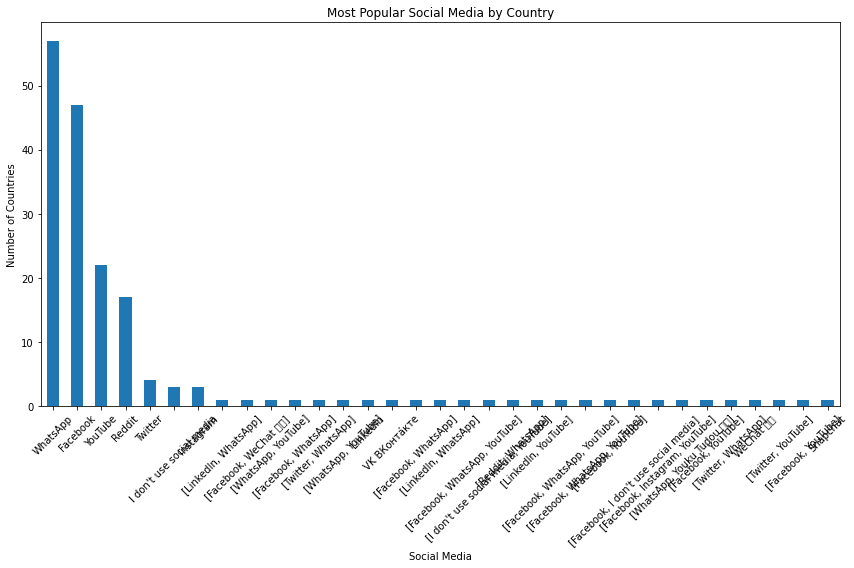

In [57]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 8))
most_popular_social_media.value_counts().plot(kind='bar')
plt.title('Most Popular Social Media by Country')
plt.xlabel('Social Media')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.loc[df['Country']=='Pakistan', :]

In [65]:
import pandas as pd
schema = pd.read_csv('datasets/so_survey_subset_schema.csv', index_col='Column')
schema

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Country,In which country do you currently reside?
YearsCode,"Including any education, how many years have y..."
ConvertedComp,Salary converted to annual USD salaries using ...
LanguageWorkedWith,"Which of the following programming, scripting,..."
SocialMedia,What social media site do you use the most?
Age,What is your age (in years)? If you prefer not...


In [66]:
schema.loc['Hobbyist']

QuestionText    Do you code as a hobby?
Name: Hobbyist, dtype: object

In [67]:
df['Hobbyist']

Respondent
1        Yes
2         No
3        Yes
4         No
5        Yes
        ... 
88377    Yes
88601     No
88802     No
88816     No
88863    Yes
Name: Hobbyist, Length: 88883, dtype: object

In [68]:
schema.loc['Country']

QuestionText    In which country do you currently reside?
Name: Country, dtype: object

In [69]:
df['Country']

Respondent
1                United Kingdom
2        Bosnia and Herzegovina
3                      Thailand
4                 United States
5                       Ukraine
                  ...          
88377                    Canada
88601                       NaN
88802                       NaN
88816                       NaN
88863                     Spain
Name: Country, Length: 88883, dtype: object

In [70]:
schema.loc['ConvertedComp']

QuestionText    Salary converted to annual USD salaries using ...
Name: ConvertedComp, dtype: object

In [71]:
df['ConvertedComp']

Respondent
1            NaN
2            NaN
3         8820.0
4        61000.0
5            NaN
          ...   
88377        NaN
88601        NaN
88802        NaN
88816        NaN
88863        NaN
Name: ConvertedComp, Length: 88883, dtype: float64

In [72]:
schema.loc['LanguageWorkedWith']

QuestionText    Which of the following programming, scripting,...
Name: LanguageWorkedWith, dtype: object

In [73]:
!cat datasets/so_survey_subset_schema.csv

Column,QuestionText
Respondent,Randomized respondent ID number (not in order of survey response time)
MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
Hobbyist,Do you code as a hobby?
Country,In which country do you currently reside?
YearsCode,"Including any education, how many years have you been coding?"
ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks."
LanguageWorkedWith,"Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)"
SocialMedia,What social media site do you use the most?
Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank.

In [74]:
df['LanguageWorkedWith']

Respondent
1                          HTML/CSS;Java;JavaScript;Python
2                                      C++;HTML/CSS;Python
3                                                 HTML/CSS
4                                      C;C++;C#;Python;SQL
5              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
88377                        HTML/CSS;JavaScript;Other(s):
88601                                                  NaN
88802                                                  NaN
88816                                                  NaN
88863    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [75]:
schema.loc['SocialMedia']

QuestionText    What social media site do you use the most?
Name: SocialMedia, dtype: object

In [76]:
df['SocialMedia']

Respondent
1          Twitter
2        Instagram
3           Reddit
4           Reddit
5         Facebook
           ...    
88377      YouTube
88601          NaN
88802          NaN
88816          NaN
88863     WhatsApp
Name: SocialMedia, Length: 88883, dtype: object

In [77]:
df

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
1,I am a student who is learning to code,Yes,United Kingdom,4,NaN,HTML/CSS;Java;JavaScript;Python,Twitter,14.0,Man
2,I am a student who is learning to code,No,Bosnia and Herzegovina,NaN,NaN,C++;HTML/CSS;Python,Instagram,19.0,Man
3,"I am not primarily a developer, but I write co...",Yes,Thailand,3,8820.0,HTML/CSS,Reddit,28.0,Man
4,I am a developer by profession,No,United States,3,61000.0,C;C++;C#;Python;SQL,Reddit,22.0,Man
5,I am a developer by profession,Yes,Ukraine,16,NaN,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Facebook,30.0,Man
...,...,...,...,...,...,...,...,...,...
88377,NaN,Yes,Canada,NaN,NaN,HTML/CSS;JavaScript;Other(s):,YouTube,NaN,Man
88601,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88802,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Let us perform some basic statistical analysis on the Dataset

In [78]:
# Returns the count of non-NA values for a series object.
df['Hobbyist'].count()

88883

In [79]:
# Returns a Series containing counts of unique rows.
df['Hobbyist'].value_counts()

Yes    71257
No     17626
Name: Hobbyist, dtype: int64

In [80]:
# Returns the count of non-NA values for a series object.
df['Country'].count()

88751

In [81]:
# Returns a Series containing counts of unique rows.
df['Country'].value_counts()

United States        20949
India                 9061
Germany               5866
United Kingdom        5737
Canada                3395
                     ...  
Tonga                    1
Timor-Leste              1
North Korea              1
Brunei Darussalam        1
Chad                     1
Name: Country, Length: 179, dtype: int64

In [82]:
# To get the count of countries whose developers participated in the survey
df['Country'].value_counts().count()

179

In [ ]:
# Returns the count of non-NA values for a series object.
df['ConvertedComp'].count()

In [ ]:
# Returns a Series containing counts of unique rows.
df['ConvertedComp'].value_counts()

In [ ]:
df['ConvertedComp'].mean()

In [ ]:
df['ConvertedComp'].median()

In [ ]:
df.describe()

<h1 align="center">Let us try answering certain Questions</h1>

##  Question 1: 
>**List the most popular SocialMedia web site for every Country**

**Let us first  do the easy task, and that is to list the most popular SocialMedia website of a single country (lets say Pakistan)**

In [23]:
df

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
1,I am a student who is learning to code,Yes,United Kingdom,4,NaN,HTML/CSS;Java;JavaScript;Python,Twitter,14.0,Man
2,I am a student who is learning to code,No,Bosnia and Herzegovina,NaN,NaN,C++;HTML/CSS;Python,Instagram,19.0,Man
3,"I am not primarily a developer, but I write co...",Yes,Thailand,3,8820.0,HTML/CSS,Reddit,28.0,Man
4,I am a developer by profession,No,United States,3,61000.0,C;C++;C#;Python;SQL,Reddit,22.0,Man
5,I am a developer by profession,Yes,Ukraine,16,NaN,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Facebook,30.0,Man
...,...,...,...,...,...,...,...,...,...
88377,NaN,Yes,Canada,NaN,NaN,HTML/CSS;JavaScript;Other(s):,YouTube,NaN,Man
88601,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88802,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.groupby('Country')['SocialMedia'].first()

Country
Afghanistan                                             Facebook
Albania                                                 Facebook
Algeria                                                 Facebook
Andorra                                 I don't use social media
Angola                                                   Twitter
                                                  ...           
Venezuela, Bolivarian Republic of...                     Twitter
Viet Nam                                                 YouTube
Yemen                                                   Facebook
Zambia                                                    Reddit
Zimbabwe                                                WhatsApp
Name: SocialMedia, Length: 179, dtype: object

In [84]:
df.loc[df.Country =='Pakistan', 'SocialMedia'].value_counts()

WhatsApp                    266
Facebook                    232
YouTube                     182
LinkedIn                     71
Twitter                      58
Instagram                    41
Reddit                       28
I don't use social media     23
Snapchat                      5
Hello                         1
VK ВКонта́кте                 1
Name: SocialMedia, dtype: int64

In [85]:
df.loc[df.Country =='Pakistan', :]
df.loc[df.Country =='Pakistan', 'SocialMedia'].head(10)
df.loc[df.Country =='Pakistan', 'SocialMedia'].value_counts()
df.loc[df.Country =='Pakistan', 'SocialMedia'].value_counts(normalize=True)
df.loc[df.Country =='China', 'SocialMedia'].value_counts()

WeChat 微信                   403
YouTube                      53
Weibo 新浪微博                   42
I don't use social media     27
Twitter                      27
Reddit                       12
LinkedIn                     11
Facebook                      8
Instagram                     7
Youku Tudou 优酷                7
WhatsApp                      3
VK ВКонта́кте                 1
Name: SocialMedia, dtype: int64

In [48]:
df.groupby('Country')

In [86]:
df.groupby('Country').get_group("Pakistan")

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
84,I am a developer by profession,No,Pakistan,3,3468.0,C;C++;C#;Java;Kotlin;PHP;SQL,WhatsApp,26.0,Man
119,I am a developer by profession,No,Pakistan,10,NaN,C;C++;C#;HTML/CSS;Java;JavaScript;SQL,Facebook,28.0,Man
298,I am a developer by profession,Yes,Pakistan,4,NaN,HTML/CSS;JavaScript;PHP;SQL;Other(s):,LinkedIn,23.0,Man
299,I am a developer by profession,Yes,Pakistan,19,NaN,Assembly;C;C++;Java;Python;SQL,Facebook,25.0,Man
311,I am a developer by profession,No,Pakistan,5,2600.0,Assembly;C;C++;C#;HTML/CSS;Java;Python;Scala;SQL,LinkedIn,24.0,Man
...,...,...,...,...,...,...,...,...,...
88862,I am a student who is learning to code,Yes,Pakistan,3,NaN,Java,WhatsApp,21.0,Man
5439,NaN,Yes,Pakistan,2,NaN,NaN,Instagram,24.0,Woman
39117,NaN,Yes,Pakistan,4,NaN,C;C++;C#;HTML/CSS;Java;JavaScript;SQL,WhatsApp,22.0,Man


In [87]:
df.groupby('Country').get_group("Pakistan").loc[:, 'SocialMedia']

Respondent
84        WhatsApp
119       Facebook
298       LinkedIn
299       Facebook
311       LinkedIn
           ...    
88862     WhatsApp
5439     Instagram
39117     WhatsApp
60066      YouTube
88182      Twitter
Name: SocialMedia, Length: 923, dtype: object

In [88]:
df.groupby('Country').get_group("Pakistan").loc[:, 'SocialMedia'].value_counts()

WhatsApp                    266
Facebook                    232
YouTube                     182
LinkedIn                     71
Twitter                      58
Instagram                    41
Reddit                       28
I don't use social media     23
Snapchat                      5
Hello                         1
VK ВКонта́кте                 1
Name: SocialMedia, dtype: int64

In [89]:
df.groupby('Country')['SocialMedia'].value_counts().head(60)

Country              SocialMedia             
Afghanistan          Facebook                     15
                     YouTube                       9
                     I don't use social media      6
                     WhatsApp                      4
                     Instagram                     1
                     LinkedIn                      1
                     Twitter                       1
Albania              WhatsApp                     18
                     Facebook                     16
                     Instagram                    13
                     YouTube                      10
                     Twitter                       8
                     LinkedIn                      7
                     Reddit                        6
                     I don't use social media      4
                     Snapchat                      1
                     WeChat 微信                     1
Algeria              YouTube                      42


In [94]:
df.groupby('Country')['SocialMedia'].agg(pd.Series.mode)

Country
Afghanistan                                                         Facebook
Albania                                                             WhatsApp
Algeria                                                              YouTube
Andorra                                 [Facebook, I don't use social media]
Angola                                                               Twitter
                                                        ...                 
Venezuela, Bolivarian Republic of...                                WhatsApp
Viet Nam                                                            Facebook
Yemen                                                               WhatsApp
Zambia                                                              Facebook
Zimbabwe                                                            WhatsApp
Name: SocialMedia, Length: 179, dtype: object

In [ ]:
df.groupby('Country')['SocialMedia'].value_counts().head(50)

In [ ]:
df.groupby('Country')['SocialMedia'].value_counts().head(50)

In [90]:
df.groupby('Country')['SocialMedia'].value_counts().sort_values()[0]

1

In [91]:
df.groupby('Country')['SocialMedia'].value_counts().sort_values().shape

(1220,)

In [92]:
df.shape

(88883, 9)

In [93]:
df['Country'].unique()

array(['United Kingdom', 'Bosnia and Herzegovina', 'Thailand',
       'United States', 'Ukraine', 'Canada', 'India', 'New Zealand',
       'Antigua and Barbuda', 'Germany', 'Australia',
       'Russian Federation', 'Brazil', 'Lithuania', 'Israel',
       'South Africa', 'Colombia', 'Turkey', 'Switzerland', 'Argentina',
       'Sri Lanka', 'Czech Republic', 'Denmark', 'Malaysia', 'Bangladesh',
       'Spain', 'Serbia', 'Poland', 'Sweden', 'China', 'France',
       'Netherlands', 'Italy', 'Philippines', 'Ireland', 'Pakistan',
       'Azerbaijan', 'Austria', 'Estonia', 'Croatia', 'South Korea',
       'Greece', 'Japan', 'Romania', 'Finland', 'Bulgaria', 'Viet Nam',
       'Slovenia', 'Iran', 'Belarus', 'Hungary', 'Latvia',
       'Hong Kong (S.A.R.)', 'United Arab Emirates', 'Portugal',
       'Nigeria', 'Norway', 'Nicaragua', 'Zimbabwe', 'Egypt', 'Mexico',
       'Dominican Republic', 'Guatemala', 'Chile', 'Ecuador', 'Ghana',
       'Uganda', 'Cambodia', 'Mauritius', 'Nepal', 'Singapore'

##  Question 2: 
>**What percentage of people in each country knows Python programming?**

**tc** = Total count of people from each country who participated in the survey?

**pc** = Python People: Count of people from each country who knows Python

**tc (option 1):**

In [96]:
df

,MainBranch,Hobbyist,Country,YearsCode,ConvertedComp,LanguageWorkedWith,SocialMedia,Age,Gender
Respondent,,,,,,,,,
1,I am a student who is learning to code,Yes,United Kingdom,4,NaN,HTML/CSS;Java;JavaScript;Python,Twitter,14.0,Man
2,I am a student who is learning to code,No,Bosnia and Herzegovina,NaN,NaN,C++;HTML/CSS;Python,Instagram,19.0,Man
3,"I am not primarily a developer, but I write co...",Yes,Thailand,3,8820.0,HTML/CSS,Reddit,28.0,Man
4,I am a developer by profession,No,United States,3,61000.0,C;C++;C#;Python;SQL,Reddit,22.0,Man
5,I am a developer by profession,Yes,Ukraine,16,NaN,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Facebook,30.0,Man
...,...,...,...,...,...,...,...,...,...
88377,NaN,Yes,Canada,NaN,NaN,HTML/CSS;JavaScript;Other(s):,YouTube,NaN,Man
88601,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88802,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df.loc[:, 'Country']

Respondent
1                United Kingdom
2        Bosnia and Herzegovina
3                      Thailand
4                 United States
5                       Ukraine
                  ...          
88377                    Canada
88601                       NaN
88802                       NaN
88816                       NaN
88863                     Spain
Name: Country, Length: 88883, dtype: object

In [98]:
tc = df['Country'].value_counts()
tc.name = 'Total'
tc

United States        20949
India                 9061
Germany               5866
United Kingdom        5737
Canada                3395
                     ...  
Tonga                    1
Timor-Leste              1
North Korea              1
Brunei Darussalam        1
Chad                     1
Name: Total, Length: 179, dtype: int64

**tc (option 2):**

In [99]:
dfgb = df.groupby('Country')
dfgb

In [100]:
df.groupby('Country')['Country']

In [101]:
df.groupby('Country')['Country'].apply(lambda x: x.value_counts())

Country                                                                   
Afghanistan                           Afghanistan                              44
Albania                               Albania                                  86
Algeria                               Algeria                                 134
Andorra                               Andorra                                   7
Angola                                Angola                                    5
                                                                             ... 
Venezuela, Bolivarian Republic of...  Venezuela, Bolivarian Republic of...     88
Viet Nam                              Viet Nam                                231
Yemen                                 Yemen                                    19
Zambia                                Zambia                                   12
Zimbabwe                              Zimbabwe                                 39
Name: Country, Length: 

**pc:**

In [102]:
df.loc[:, 'LanguageWorkedWith']

Respondent
1                          HTML/CSS;Java;JavaScript;Python
2                                      C++;HTML/CSS;Python
3                                                 HTML/CSS
4                                      C;C++;C#;Python;SQL
5              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
88377                        HTML/CSS;JavaScript;Other(s):
88601                                                  NaN
88802                                                  NaN
88816                                                  NaN
88863    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [103]:
df.groupby('Country')['LanguageWorkedWith']

In [104]:
df.groupby('Country')['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python'))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10572\3108121647.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('Country')['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python'))


Respondent
1         True
2         True
3        False
4         True
5         True
         ...  
88182    False
88212     True
88282    False
88377    False
88863    False
Name: LanguageWorkedWith, Length: 88751, dtype: object

In [105]:
pp = df.groupby('Country')['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
pp

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [68]:
pp.name = 'Knows Python'

**Create a Dataframe of two series tc and pp**

In [106]:
resultdf = pd.concat([tc, pp], axis=1)
resultdf

,Total,LanguageWorkedWith
United States,20949,10083
India,9061,3105
Germany,5866,2451
United Kingdom,5737,2384
Canada,3395,1558
...,...,...
Tonga,1,0
Timor-Leste,1,1
North Korea,1,0
Brunei Darussalam,1,0


In [107]:
resultdf.loc['Pakistan']

Total                 923
LanguageWorkedWith    251
Name: Pakistan, dtype: int64

**Percentage of people in each country knows Python?**

In [108]:
resultdf['Percentage'] = (resultdf['Knows Python'] / resultdf['Total']) * 100
resultdf

KeyError: 'Knows Python'

In [ ]:
resultdf.loc['Pakistan']